# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Sara Calle Muñoz
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [ ]:
def myint(n_binario):
    if len(n_binario) != 16:  #verifica que el número binario tenga exactamente 16 bits
        raise ValueError('El número debe tener 16 bits')

    valor = 0  #acumulará el valor decimal
    potencia = 0  #usada para elevar 2^potencia en cada posición

    #recorre los bits de derecha a izquierda (de menor a mayor peso)
    for i in reversed(n_binario):
        if i == '1':
            valor += 2**potencia  #suma 2**potencia si el bit es 1
        potencia += 1  #aumenta la potencia para el siguiente bit

    return valor

In [ ]:
#comparamos con el valor solicitado
myint('0001000011100001')
print(myint('0001000011100001'))

int(0b1000011100001)
print(int(0b1000011100001))

4321
4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [ ]:
def number64(n_binario):
    if len(n_binario) != 64: #verifica que la cadena tenga 64 bits
        raise ValueError('El número debe tener 64 bits')

    #para el signo
    signo = int(n_binario[0])  #primer bit indica el signo
    signo = -1 if signo == 1 else 1

    #para el exponente
    exp_bin = n_binario[1:12]  #bits 1 a 11 (11 bits para el exponente)
    exponente = int(exp_bin, 2) - 1023  #convierte a decimal y aplica el sesgo IEEE 754

    #para la mantisa
    mantisa_bin = n_binario[12:64]  #bits 12 a 63 (52 bits)
    mantisa = 0.0
    for i, bit in enumerate(mantisa_bin):
        if bit == '1':
            mantisa += 2**(-i-1)  #cada bit representa 1/(2^(i+1))

    #para el valor
    valor = signo * 2**exponente * (1 + mantisa)

    return valor

print(number64("0100000000111011100100001111111111111111111111111111111111111111"))


27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



In [1]:
import math

#función para calcular la serie hasta N términos
def P_n(x, N):
    suma = 0
    for i in range(1, N + 1):
        termino = ((-1) ** (i + 1)) * (x ** (2 * i - 1)) / (2 * i - 1)
        suma += termino
    return suma

#aproximación básica de pi usando arctan(1)
tol = 1e-3  #tolerancia
n = 1 #número inicial de términos

while True:
    pi_aprox = 4 * P_n(1, n)  #4 * arctan(1)
    if abs(pi_aprox - math.pi) < tol:
        break
    n += 1

print(f"Aproximación de π con tol = 1e-3: {pi_aprox}")
print(f"Términos necesarios: {n}")
print(f"Error absoluto: {abs(pi_aprox - math.pi)}")

#proximación básica de pi con tol = 1e-4
tol = 1e-4  #tolerancia
n = 1 #número inicial de términos

while True:
    pi_aprox = 4 * P_n(1, n)  #4 * arctan(1)
    if abs(pi_aprox - math.pi) < tol:
        break
    n += 1

print(f"\nAproximación de π con tol = 1e-4: {pi_aprox}")
print(f"Términos necesarios: {n}")
print(f"Error absoluto: {abs(pi_aprox - math.pi)}")

Aproximación de π con tol = 1e-3: 3.140592653839794
Términos necesarios: 1000
Error absoluto: 0.000999999749998981

Aproximación de π con tol = 1e-4: 3.1414926535900345
Términos necesarios: 10000
Error absoluto: 9.99999997586265e-05


In [ ]:
#Mejoremos la convergencia con  π / 4 = arctan(1/2) + arctan(1/3)
#usamos P_n(x, N)

tol = 1e-3
n = 1

while True:
    pi_aprox = 4 * (P_n(1/2, n) + P_n(1/3, n))
    if abs(pi_aprox - math.pi) < tol:
        break
    n += 1

print(f"Aproximación de π con arctan(1/2) + arctan(1/3) con tol = 1e-3: {pi_aprox}")
print(f"Términos necesarios por serie: {n}")
print(f"Error absoluto: {abs(pi_aprox - math.pi)}")

#con tol =1e-6
tol = 1e-6
n = 1

while True:
    pi_aprox = 4 * (P_n(1/2, n) + P_n(1/3, n))
    if abs(pi_aprox - math.pi) < tol:
        break
    n += 1

print(f"\nAproximación de π con arctan(1/2) + arctan(1/3) con tol = 1e-6: {pi_aprox}")
print(f"Términos necesarios por serie: {n}")
print(f"Error absoluto: {abs(pi_aprox - math.pi)}")

Aproximación de π con arctan(1/2) + arctan(1/3) con tol = 1e-3: 3.1408505617610554
Términos necesarios por serie: 4
Error absoluto: 0.0007420918287377454

Aproximación de π con arctan(1/2) + arctan(1/3) con tol = 1e-6: 3.1415929813345667
Términos necesarios por serie: 9
Error absoluto: 3.2774477354280407e-07


In [ ]:
#Mejoremos aún más la convergencia utilizando π = 4 * (4*arctan(1/5)−arctan(1/239))
#usamos P_n(x, N)
tol = 1e-3
n = 1

while True:
    pi_aprox = 4 * (4 * P_n(1/5, n) - P_n(1/239, n))
    if abs(pi_aprox - math.pi) < tol:
        break
    n += 1

print(f"Aproximación de π con 4 * (4*arctan(1/5)−arctan(1/239)) con tol = 1e-3: {pi_aprox}")
print(f"Términos necesarios por serie: {n}")
print(f"Error absoluto: {abs(pi_aprox - math.pi)}")

#con tol =1e-6
tol = 1e-6
n = 1

while True:
    pi_aprox = 4 * (4 * P_n(1/5, n) - P_n(1/239, n))
    if abs(pi_aprox - math.pi) < tol:
        break
    n += 1

print(f"\nAproximación de π con 4 * (4*arctan(1/5)−arctan(1/239)) con tol = 1e-6: {pi_aprox}")
print(f"Términos necesarios por serie: {n}")
print(f"Error absoluto: {abs(pi_aprox - math.pi)}")
#observe que este último método requiere un número significativamente menor a comparación con el primer método
#en comparación al segundo también es un poco más eficiente

Aproximación de π con 4 * (4*arctan(1/5)−arctan(1/239)) con tol = 1e-3: 3.1405970293260603
Términos necesarios por serie: 2
Error absoluto: 0.0009956242637327861

Aproximación de π con 4 * (4*arctan(1/5)−arctan(1/239)) con tol = 1e-6: 3.1415917721821773
Términos necesarios por serie: 4
Error absoluto: 8.814076157825923e-07


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#serie de Taylor para e^{-x}
def exponencial(x, N):
    """
    Calcula e^{-x} usando la serie de taylor truncada en N términos:
    e^{-x} ≈ sum_{i=0}^{N} (-1)^i * x^i / i!
    """
    exp = 0  #iniciamos la suma
    for i in range(N):
        exp += (-1)**i * x**i / math.factorial(i)  # Término i-ésimo de la serie
    return exp


#truncamos la serie
def exponencial_truncado(x, N):
    """
    Calcula e^{-x} truncando la serie cuando el siguiente término es menor
    que un umbral relativo (1e-7 * valor de la serie).
    """
    ex = exponencial(x, N)  #valor inicial de la serie
    tol = abs(1e-7 * ex)

    for i in range(N):
        #valor absoluto del siguiente término de la serie
        siguiente = abs((-x)**(i+1) / math.factorial(i+1))
        if siguiente <= tol:
            break  #terminamos cuando el término es suficientemente pequeño

    #calculamos la serie hasta el término i
    exp = exponencial(x, i)
    return exp, i  #devolvemos el valor aproximado y el número de términos usados

#usamos 1/e^x
def invertida(x, N):
    """
    Calcula e^{-x} como 1 / (serie de Taylor de e^{x}).
    Es útil cuando x es grande.
    """
    exp = 0
    for i in range(N):
        exp += x**i / math.factorial(i)
    return 1 / exp


In [4]:
#comparemos con distintios valores de x
#evaluemos para x = 0.1
x = 0.1
N = 100
exacto = np.exp(-x)  #valor exacto

print("Para x = 0.1")
print(f"Valor de la serie: {exponencial(x, N)}")
print(f"Valor de la serie truncado: {exponencial_truncado(x, N)}")
print(f"Valor exacto: {exacto}")
print()

#evaluamos para x = 6
x = 6
exacto = np.exp(-x)
print("Para x = 6")
print(f"Valor de la serie: {exponencial(x, N)}")
print(f"Valor de la serie truncado: {exponencial_truncado(x, N)}")
print(f"Valor exacto: {exacto}")
print()

#evaluamos para x = 10
x = 10
exacto = np.exp(-x)
print("Para x = 10")
print(f"Valor de la serie (forma alternante): {exponencial(x, N)}")
print(f"Valor de la serie (forma invertida): {invertida(x, N)}")
print(f"Valor exacto: {exacto}")
print()


Para x = 0.1
Valor de la serie: 0.9048374180359596
Valor de la serie truncado: (0.9048333333333334, 4)
Valor exacto: 0.9048374180359595

Para x = 6
Valor de la serie: 0.0024787521766645613
Valor de la serie truncado: (0.0024787514789560493, 30)
Valor exacto: 0.0024787521766663585

Para x = 10
Valor de la serie (forma alternante): 4.5399929433607724e-05
Valor de la serie (forma invertida): 4.539992976248486e-05
Valor exacto: 4.5399929762484854e-05



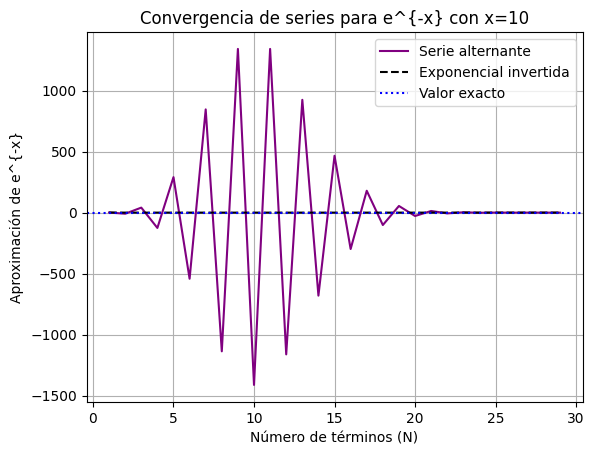

In [14]:
#inicializamos listas vacías para guardar los resultados
N_vals = []
exp1_ = []  #resultados de la serie alternante
exp2_ = []  #resultados de la serie invertida

for N in range(1, 30):
    N_vals.append(N)
    exp1_.append(exponencial(x, N))
    exp2_.append(invertida(x, N))

#graficamos los valores para ambas aproximaciones
plt.figure()
plt.plot(N_vals, exp1_, "-", color = 'purple', label="Serie alternante")
plt.plot(N_vals, exp2_, "k--", label="Exponencial invertida")
plt.axhline(exacto, color='blue', linestyle=':', label="Valor exacto")
plt.legend()
plt.xlabel("Número de términos (N)")
plt.ylabel("Aproximación de e^{-x}")
plt.title("Convergencia de series para e^{-x} con x=10")
plt.grid(True)
plt.show()

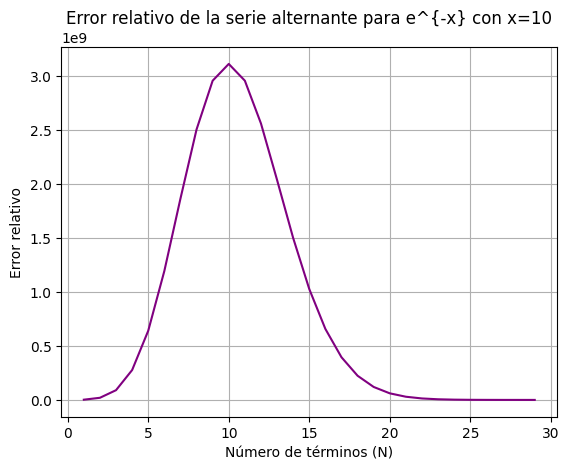

In [13]:
#calculamos el error relativo de cada valor
errores = []
for val in exp1_:
    error = abs(val - exacto) / exacto * 100
    errores.append(error)

#graficamos el error relativo
plt.figure()
plt.plot(N_vals, errores, color = 'purple')
plt.xlabel("Número de términos (N)")
plt.ylabel("Error relativo")
plt.title("Error relativo de la serie alternante para e^{-x} con x=10")
plt.grid(True)
plt.show()

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [ ]:
#definimos f(x) tal que retorne el valor  x(x−1)
def f(x):
    return x * (x - 1)

#definimos la derivada con la fórmula
def derivada(f, x, delta):
    return (f(x + delta) - f(x)) / delta

#definimos la derivada a mano
def derivada_analitica(x):
    return 2*x - 1

#definimos el punto solicitado
x = 1
delta = 1e-2

#comparamos
aproximacion = derivada(f, x, delta)
exacta = derivada_analitica(x)

print(f"Derivada numérica: {aproximacion}")
print(f"Derivada exacta: {exacta}")
print(f"Error absoluto: {abs(aproximacion - exacta)}")

#los resultados no coinciden exactamente porque la computadora no puede trabajar con números tan pequeños
#cuando usamos valores de δ muy grandes, la aproximación no es precisa
#cuando usamos valores muy pequeños, la computadora comete errores por redondeo al restar dos números casi iguales

Derivada numérica: 1.010000000000001
Derivada exacta: 1
Error absoluto: 0.010000000000000897


In [ ]:
#definimos varios deltas para comparar
deltas = [1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

print("δ\tAproximada\tExacta\t\tError")
for delta in deltas:
    aprox = derivada(f, x, delta)
    error = abs(aprox - exacta)
    print(f"{delta:.0e}\t{aprox:.10f}\t{exacta:.10f}\t{error:.2e}")


δ	Aproximada	Exacta		Error
1e-04	1.0001000000	1.0000000000	1.00e-04
1e-06	1.0000009999	1.0000000000	1.00e-06
1e-08	1.0000000039	1.0000000000	3.92e-09
1e-10	1.0000000828	1.0000000000	8.28e-08
1e-12	1.0000889006	1.0000000000	8.89e-05
1e-14	0.9992007222	1.0000000000	7.99e-04
